In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Usman\Downloads\churn\Churn_Modelling.csv")
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3778,3779,15658486,Gidney,579,Spain,Female,59,3,148021.12,1,1,1,74878.22,0
2397,2398,15747724,Briggs,671,Spain,Female,34,10,0.00,1,1,0,23235.38,0
7677,7678,15711977,Finch,695,France,Male,36,4,161533.00,1,1,0,100940.91,0
9308,9309,15728683,Lombardo,742,France,Male,27,0,0.00,2,0,1,131534.96,0
8821,8822,15619953,Efremov,662,Spain,Female,42,6,105021.28,1,1,0,48242.38,0
6040,6041,15735358,Dowse,682,Spain,Male,46,4,0.00,1,1,1,4654.28,0


In [3]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1)

In [4]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7685,705,Germany,Female,40,3,92889.91,1,1,1,109496.69,0
3285,735,Germany,Female,43,9,98807.45,1,0,0,184570.04,1
6327,667,Spain,Female,36,3,121542.57,2,1,1,186841.71,0
2856,432,Germany,Female,45,3,110219.14,1,1,0,43046.70,1
8731,727,Spain,Female,41,10,0.00,2,0,1,47468.56,0


In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [7]:
df=pd.get_dummies(df,columns=["Geography"])

In [8]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [9]:
df["Gender"].replace({"Female":0,"Male":1},inplace=True)

In [10]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6330,744,0,39,6,0.00,1,0,0,10662.58,0,1,0,0
6879,665,1,25,7,90920.75,1,0,1,112256.57,0,1,0,0
5852,544,1,22,3,66483.32,1,0,1,110317.39,0,0,0,1
3258,698,0,36,7,121263.62,1,1,1,13387.88,0,0,1,0
3148,648,0,39,6,130694.89,2,1,1,153955.38,1,1,0,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
df[["CreditScore","Balance","EstimatedSalary"]]=scaler.fit_transform(df[["CreditScore","Balance","EstimatedSalary"]])

In [13]:
df.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8091,0.836,1,29,2,0.382564,2,1,1,0.368411,0,1,0,0
5505,0.368,0,53,7,0.000000,2,1,1,0.403076,0,1,0,0
5427,0.498,1,36,3,0.513994,2,1,1,0.201553,0,0,1,0
8425,0.810,1,29,9,0.466468,1,1,1,0.109263,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop("Exited",axis=1)
y=df["Exited"]

In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
df.shape

(10000, 13)

In [19]:
len(X_train.columns)

12

In [20]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [21]:
model.fit(X_train,y_train,epochs=6)

Epoch 1/6
250/250 [==============================] - 1s 2ms/step - loss: 0.5811 - accuracy: 0.7607
Epoch 2/6
250/250 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7962
Epoch 3/6
250/250 [==============================] - 1s 2ms/step - loss: 0.5029 - accuracy: 0.7962
Epoch 4/6
250/250 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7962
Epoch 5/6
250/250 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7962
Epoch 6/6
250/250 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7962


In [22]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.7965


[0.4465085566043854, 0.796500027179718]

In [23]:
yp=model.predict(X_test)

In [24]:
yp[0:5]

array([[0.15872738],
       [0.09498125],
       [0.41486657],
       [0.29907233],
       [0.13059536]], dtype=float32)

In [25]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [26]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
y_test[0:10]

9676    0
9915    0
7093    1
7726    0
6246    1
2855    0
1456    0
1746    1
2252    0
266     0
Name: Exited, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\Usman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
confusion_matrix(y_test,y_pred)

array([[1593,    0],
       [ 407,    0]], dtype=int64)

In [31]:
import seaborn as sn

In [32]:
cm=tf.math.confusion_matrix(y_test,y_pred)

Text(69.0, 0.5, 'True')

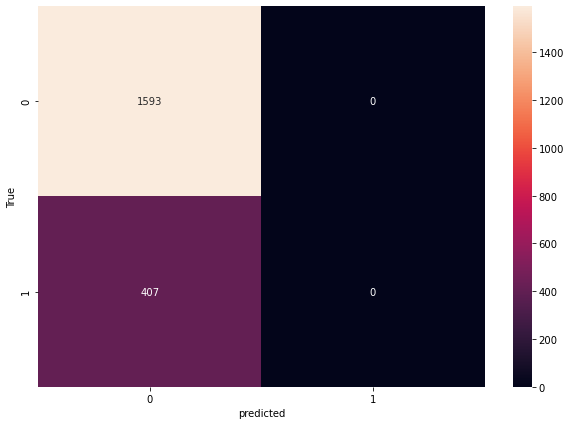

In [33]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("True")

In [34]:
#pip install imbalanced-learn

## Under Sampling

In [83]:
count_class_0,count_class_1=df.Exited.value_counts()

In [84]:
df_class_0=df[df["Exited"]==0]
df_class_1=df[df["Exited"]==1]

In [85]:
df_class_0_under=df_class_0.sample(count_class_1)

In [86]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

In [87]:
print("Random Under Sampling")
df_test_under.Exited.value_counts()

Random Under Sampling
Random Under Sampling


0    2037
1    2037
Name: Exited, dtype: int64

0    2037
1    2037
Name: Exited, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
x=df_test_under.drop("Exited",axis=1)
y=df_test_under["Exited"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [89]:
y_train.value_counts()

0    1630
1    1629
Name: Exited, dtype: int64

0    1630
1    1629
Name: Exited, dtype: int64

In [44]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(13, input_dim=12, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [91]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5186
Epoch 2/100
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6091
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6434
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6628
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.6787
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6873
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.6861
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6892
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6950
Epoch 10/100
102/102 [==============================] - 0s 2ms/step

102/102 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7094
Epoch 58/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7054
Epoch 59/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7100
Epoch 60/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7088
Epoch 61/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7033
Epoch 62/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.6993
Epoch 63/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7033
Epoch 64/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7048
Epoch 65/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7045
Epoch 66/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 

# Oversampling

In [92]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_1_over,df_class_0],axis=0)
print("Random Over sampling")
df_test_over.Exited.value_counts()

Random Over sampling
Random Over sampling


0    7963
1    7963
Name: Exited, dtype: int64

0    7963
1    7963
Name: Exited, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
x=df_test_under.drop("Exited",axis=1)
y=df_test_under["Exited"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [94]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

1    1630
0    1629
Name: Exited, dtype: int64

In [95]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(13, input_dim=12, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [96]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6832 - accuracy: 0.5459
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5766
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6042
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6250
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6398
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6573
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6680
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.6747
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.6843
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5

102/102 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7005
Epoch 30/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6975
Epoch 31/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7017
Epoch 32/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7011
Epoch 33/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.6978
Epoch 34/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.6965
Epoch 35/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.6993
Epoch 36/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7048
Epoch 37/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7017
Epoch 38/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 

102/102 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7024
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7005
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7021
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7017
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7030
Epoch 91/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7091
Epoch 92/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7027
Epoch 93/100Epoch 93/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7054
Epoch 94/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7033
Epoch 95/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5808 

## SMOTE 

In [104]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)


In [108]:
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

0    7963
1    7963
Name: Exited, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [110]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.7154 - accuracy: 0.6252
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5671 - accuracy: 0.7178
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7423
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.7435
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5155 - accuracy: 0.7436
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5119 - accuracy: 0.7463
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5110 - accuracy: 0.7486
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.7449
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.7465
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5

399/399 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.7714
Epoch 31/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7740
Epoch 32/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.7743
Epoch 33/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4616 - accuracy: 0.7728
Epoch 34/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.7745
Epoch 35/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.7759
Epoch 36/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4598 - accuracy: 0.7768
Epoch 37/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7791
Epoch 38/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.7786
Epoch 39/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 

399/399 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.7924
Epoch 59/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4378 - accuracy: 0.7920
Epoch 60/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.7932
Epoch 61/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.7975
Epoch 62/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8005
Epoch 63/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8006
Epoch 64/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8003
Epoch 65/100
Epoch 65/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.8024
Epoch 66/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8020
Epoch 67/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4265

## Ensemble with undersampling

In [35]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [37]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=15, stratify=y)

In [39]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [40]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,1,34,5,0.554265,2,0,0,0.339721,1,0,0,0
3745,0.852,0,37,1,0.371163,2,1,1,0.980432,0,1,0,0
5429,0.664,0,48,7,0.000000,2,1,0,0.325318,1,0,0,0
551,0.648,1,47,6,0.426077,1,1,1,0.010339,0,1,0,1
8967,0.970,1,25,7,0.000000,2,1,1,0.417230,1,0,0,0


In [41]:
df2_class0 = df2[df2.Exited == 0]
df2_class1 = df2[df2.Exited == 1]

In [42]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [45]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
98/98 [==============================] - 1s 2ms/step - loss: 1.3898 - accuracy: 0.5373
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5805: 0s - loss: 0.6779 - accuracy: 0.57
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6128
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6451
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6560
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6822
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6742
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6826
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6854
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss:

98/98 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6995
Epoch 82/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.6966
Epoch 83/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7021
Epoch 84/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6947
Epoch 85/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7043
Epoch 86/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7011
Epoch 87/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7008
Epoch 88/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.6954
Epoch 89/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7034
Epoch 90/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.6973
Epoch 91/100


In [46]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
98/98 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.6118
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6538
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.6621
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6768
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6819
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.6829
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6909
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.6893
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7078
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7050
Epoch 11/

98/98 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7571
Epoch 83/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7632
Epoch 84/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7594
Epoch 85/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7549
Epoch 86/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7590
Epoch 87/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7638
Epoch 88/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7581
Epoch 89/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7606
Epoch 90/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7629
Epoch 91/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7632
Epoch 92/100


In [47]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
87/87 [==============================] - 1s 2ms/step - loss: 1.7892 - accuracy: 0.6007
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6563
Epoch 3/100
87/87 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6722
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.6823
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6884
Epoch 6/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.6953
Epoch 7/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7137
Epoch 8/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7199
Epoch 9/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7181
Epoch 10/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7209
Epoch 11/

87/87 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7386
Epoch 84/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7314
Epoch 85/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7357
Epoch 86/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7354
Epoch 87/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7332
Epoch 88/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7314
Epoch 89/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7375
Epoch 90/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7300
Epoch 91/100
87/87 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7401
Epoch 92/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7365
Epoch 93/100


In [48]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [49]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.40      0.73      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.74      2000

